1


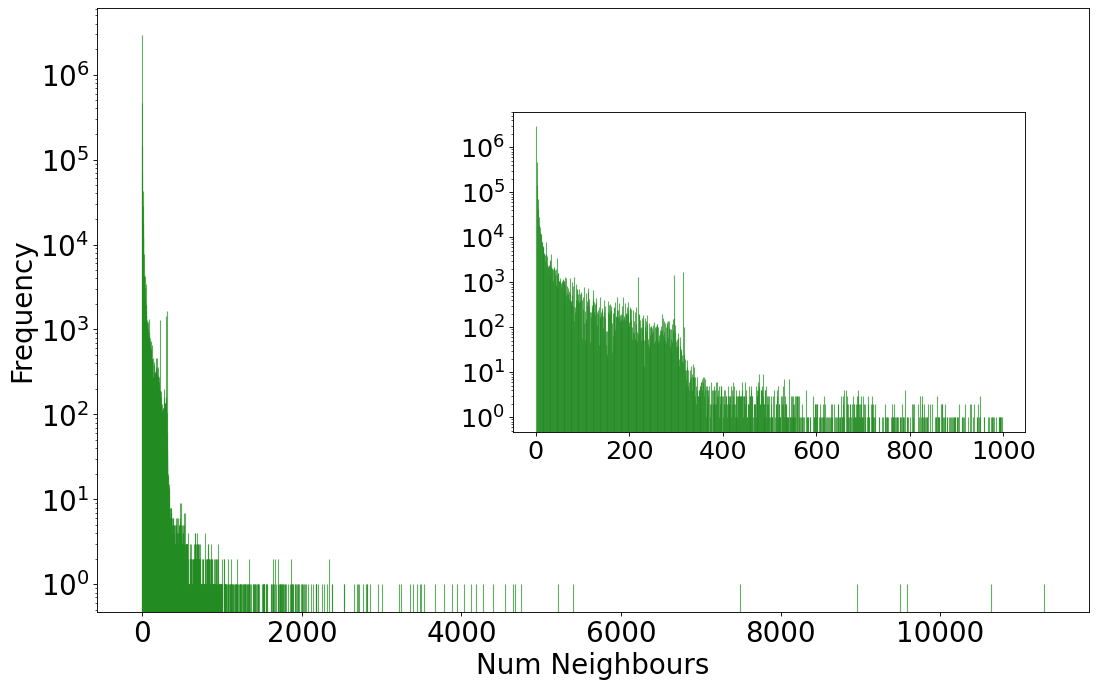

<Figure size 432x288 with 0 Axes>

In [3]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.pyplot as plt 
import numpy as np 
import json

path_to_stats = "../../experiment8/statistics/NodeActivity/"
with open(path_to_stats + "activity_distribution_dict.json","r") as inff:
    dist_dict = json.load(inff)

values = []
frequencies = []
for num_n in dist_dict.keys():
    values.append(int(num_n))
    frequencies.append(int(dist_dict[num_n]))

values, frequencies = zip(*sorted(zip(values, frequencies)))

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
fz = 25
for v,f in zip(values,frequencies):
    ax.vlines(x=v, ymin=0, ymax=f, color='forestgreen', alpha=0.7, linewidth=1)


ax.set_ylabel("Frequency", fontsize = fz)
ax.set_xlabel("Num Neighbours", fontsize = fz)
plt.xticks(fontsize = fz)
plt.yticks(fontsize = fz)
plt.yscale("log")   

frequencies, values = np.array(frequencies), np.array(values)
end_value = 1000
end_id = np.where(values > end_value)[0][0]

zoomed_f = frequencies[:end_id]
zoomed_v = values[:end_id]
print(np.min(zoomed_v))


right_inset_ax = fig.add_axes([.45, .35, .4, .4], facecolor='white')
for v,f in zip(zoomed_v,zoomed_f):
    right_inset_ax.vlines(x=v, ymin=0, ymax=f, color='forestgreen', alpha=0.7, linewidth=1)
plt.yscale("log")
plt.xticks(fontsize = fz-2)
plt.yticks(fontsize = fz-2)

plt.show()

# plt.savefig(self.path_to_plots + "node_activity_distribution.pdf")
# plt.savefig(self.path_to_overleaf_plots + "node_activity_distribution.pdf")
plt.clf()